In [79]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# some code to control figure aeshetics
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [5]:
data = pd.read_csv("norm_counts_mono2.txt", delimiter = "\t") 

# visualize the top 10 lines of our data
data.head(n=10)

AACTCAGAGATGCCAG-1  ACACCCTCAGGGTACA-1  ACGATACGTCATATCG-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL669831.5                 0.0                 0.0                 0.0   
FAM87B                     0.0                 0.0                 0.0   
LINC00115                  0.0                 0.0                 0.0   
FAM41C                     0.0                 0.0                 0.0   
AL645608.3                 0.0                 0.0                 0.0   
SAMD11                     0.0                 0.0                 0.0   
NOC2L                      0.0                 0.0                 0.0   
KLHL17                     0.0                 0.0                 0.0   
PLEKHN1                    0.0                 0.0                 0.0   

            ACGGGCTTCTGCGTAA-1  ACTTACTTCGCGCCAA-1  ATCATGGCACTGTTAG-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL669831.5                 0.0                 0.0                 0.0   
FAM87B                     0.0                 0.0                 0.0   
LINC00115                  0.0                 0.0                 0.0   
FAM41C                     0.0                 0.0                 0.0   
AL645608.3                 0.0                 0.0                 0.0   
SAMD11                     0.0                 0.0                 0.0   
NOC2L                      0.0                 0.0                 0.0   
KLHL17                     0.0                 0.0                 0.0   
PLEKHN1                    0.0                 0.0                 0.0   

            ATTGGTGGTTCGGCAC-1  CAACCAACAGGTGCCT-1  CAGCCGAGTCAGAAGC-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL669831.5                 0.0                 0.0                 0.0   
FAM87B                     0.0                 0.0                 0.0   
LINC00115                  0.0                 0.0                 0.0   
FAM41C                     0.0                 0.0                 0.0   
AL645608.3                 0.0                 0.0                 0.0   
SAMD11                     0.0                 0.0                 0.0   
NOC2L                      0.0                 0.0                 0.0   
KLHL17                     0.0                 0.0                 0.0   
PLEKHN1                    0.0                 0.0                 0.0   

            CATCAAGGTAGCTCCG-1  ...  CGTGAATAGGTTACAA-31  CTAACCCAGGTACTGG-31  \
AL627309.1                 0.0  ...             0.000000                  0.0   
AL669831.5                 0.0  ...             0.000000                  0.0   
FAM87B                     0.0  ...             0.000000                  0.0   
LINC00115                  0.0  ...             3.313453                  0.0   
FAM41C                     0.0  ...             0.000000                  0.0   
AL645608.3                 0.0  ...             0.000000                  0.0   
SAMD11                     0.0  ...             0.000000                  0.0   
NOC2L                      0.0  ...             0.000000                  0.0   
KLHL17                     0.0  ...             0.000000                  0.0   
PLEKHN1                    0.0  ...             0.000000                  0.0   

            CTCAAGAGTTCCGCAG-31  GCCAACGAGCTTCATG-31  GTTACGAGTGGACCAA-31  \
AL627309.1                  0.0                  0.0                  0.0   
AL669831.5                  0.0                  0.0                  0.0   
FAM87B                      0.0                  0.0                  0.0   
LINC00115                   0.0                  0.0                  0.0   
FAM41C                      0.0                  0.0                  0.0   
AL645608.3                  0.0                  0.0                  0.0   
SAMD11                      0.0                  0.0                  0.0   
NOC2L                       0.0                  0.0       

In [6]:
phenos = pd.read_csv("metadata_mono2.txt", 
                     delimiter = "\t", index_col=0) 

In [7]:
# We can check the number of samples and number of genes
# Note that data is downsized from 76467 samples (cells) to 1000 samples (cells)
data.shape
# (rows, columns) = (genes, cell barcode)

(21295, 1250)

In [8]:
# We can also output columns names (or cell barcodes)
data.columns

Index(['AACTCAGAGATGCCAG-1', 'ACACCCTCAGGGTACA-1', 'ACGATACGTCATATCG-1',
       'ACGGGCTTCTGCGTAA-1', 'ACTTACTTCGCGCCAA-1', 'ATCATGGCACTGTTAG-1',
       'ATTGGTGGTTCGGCAC-1', 'CAACCAACAGGTGCCT-1', 'CAGCCGAGTCAGAAGC-1',
       'CATCAAGGTAGCTCCG-1',
       ...
       'CGTGAATAGGTTACAA-31', 'CTAACCCAGGTACTGG-31', 'CTCAAGAGTTCCGCAG-31',
       'GCCAACGAGCTTCATG-31', 'GTTACGAGTGGACCAA-31', 'TCAGTGACAGCTGTAT-31',
       'TGAATCGCAGATCCAT-31', 'TTCTGTAAGTCAGAGC-31', 'TTCTTCCAGTCACGAG-31',
       'TTTGATCCAGTGTGCC-31'],
      dtype='object', length=1250)

In [9]:
# And row names (or genes)
data.index

Index(['AL627309.1', 'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C',
       'AL645608.3', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1',
       ...
       'AC145212.1', 'MAFIP', 'AC011043.1', 'AL592183.1', 'AC007325.4',
       'AL354822.1', 'AC004556.1', 'AC233755.2', 'AC233755.1', 'AC240274.1'],
      dtype='object', length=21295)

In [10]:
# This gives us some summary statistics about int/float columns
data.describe()

AACTCAGAGATGCCAG-1  ACACCCTCAGGGTACA-1  ACGATACGTCATATCG-1  \
count        21295.000000        21295.000000        21295.000000   
mean             0.469594            0.469594            0.469594   
std              5.605713            5.479310            5.133929   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            313.879400          223.880600          191.326500   

       ACGGGCTTCTGCGTAA-1  ACTTACTTCGCGCCAA-1  ATCATGGCACTGTTAG-1  \
count        21295.000000        21295.000000        21295.000000   
mean             0.469594            0.469594            0.469594   
std              6.073566            6.684452            6.437663   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            264.279600          355.781400          319.013200   

       ATTGGTGGTTCGGCAC-1  CAACCAACAGGTGCCT-1  CAGCCGAGTCAGAAGC-1  \
count        21295.000000        21295.000000        21295.000000   
mean             0.469594            0.469594            0.469594   
std              5.383154            6.056891            6.612219   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max            304.837600          365.906200          550.277100   

       CATCAAGGTAGCTCCG-1  ...  CGTGAATAGGTTACAA-31  CTAACCCAGGTACTGG-31  \
count        21295.000000  ...         21295.000000         21295.000000   
mean             0.469594  ...             0.469594             0.469594   
std              5.578231  ...             5.034227             4.631553   
min              0.000000  ...             0.000000             0.000000   
25%              0.000000  ...             0.000000             0.000000   
50%              0.000000  ...             0.000000             0.000000   
75%              0.000000  ...             0.000000             0.000000   
max            376.977400  ...           420.808500           179.738562   

       CTCAAGAGTTCCGCAG-31  GCCAACGAGCTTCATG-31  GTTACGAGTGGACCAA-31  \
count         21295.000000         21295.000000         21295.000000   
mean              0.469594             0.469594             0.469594   
std               4.627687             4.500157             5.132809   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max             178.571400           191.897700           448.933800   

       TCAGTGACAGCTGTAT-31  TGAATCGCAGATCCAT-31  TTCTGTAAGTCAGAGC-31  \
count         21295.000000         21295.000000         21295.000000   
mean              0.469594             0.469594             0.469594   
std               4.353990             4.657468             4.465375   
min               0.000000             0.000000             0.000000   
25%               0.000000             0.000000             0.000000   
50%               0.000000             0.000000             0.000000   
75%               0.000000             0.000000             0.000000   
max             235.101100           289.795900           203.655400   

       TTCTTCCAGTCACGAG-31  TTTGATCCAGTGTGCC-31  
count         21295.000000         21295.000000  
mean              0.469594             0.469594  
std     

In [11]:
# We also have info about sample phenotypes
# Phenotypes- description of the cell barcode outer characteristics
phenos

orig.ident  nCount_RNA  nFeature_RNA  percent.mt cluster  \
AACTCAGAGATGCCAG-1    immunity         731           374    0.273598   mono2   
ACACCCTCAGGGTACA-1    immunity        4483          1051    2.275262   mono2   
ACGATACGTCATATCG-1    immunity        5041          1193    1.725848   mono2   
ACGGGCTTCTGCGTAA-1    immunity        1555           406    2.443730   mono2   
ACTTACTTCGCGCCAA-1    immunity        1528           413    0.130890   mono2   
...                        ...         ...           ...         ...     ...   
TCAGTGACAGCTGTAT-31   immunity         383           300    0.261097   mono2   
TGAATCGCAGATCCAT-31   immunity        1305           654    0.229885   mono2   
TTCTGTAAGTCAGAGC-31   immunity         573           403    0.174520   mono2   
TTCTTCCAGTCACGAG-31   immunity         463           389    0.835073   mono2   
TTTGATCCAGTGTGCC-31   immunity         373           287    1.072386   mono2   

                     dx  patient  nCount_SCT  nFeature_SCT  SCT_snn_res.0.2  \
AACTCAGAGATGCCAG-1   MS  MS19270        2039           447                3   
ACACCCTCAGGGTACA-1   MS  MS19270        3082          1027                3   
ACGATACGTCATATCG-1   MS  MS19270        3136          1095                3   
ACGGGCTTCTGCGTAA-1   MS  MS19270        2346           410                3   
ACTTACTTCGCGCCAA-1   MS  MS19270        2361           425                3   
...                  ..      ...         ...           ...              ...   
TCAGTGACAGCTGTAT-31  VE  VE66730        1829           484                2   
TGAATCGCAGATCCAT-31  VE  VE66730        2450           678                3   
TTCTGTAAGTCAGAGC-31  VE  VE66730        1915           503                3   
TTCTTCCAGTCACGAG-31  VE  VE66730        1891           565                0   
TTTGATCCAGTGTGCC-31  VE  VE66730        1821           478                2   

                     seurat_clusters  
AACTCAGAGATGCCAG-1                 3  
ACACCCTCAGGGTACA-1                 3  
ACGATACGTCATATCG-1                 3  
ACGGGCTTCTGCGTAA-1                 3  
ACTTACTTCGCGCCAA-1                 3  
...                              ...  
TCAGTGACAGCTGTAT-31                2  
TGAATCGCAGATCCAT-31                3  
TTCTGTAAGTCAGAGC-31                3  
TTCTTCCAGTCACGAG-31                0  
TTTGATCCAGTGTGCC-31                2  

[1250 rows x 11 columns]

In [12]:
phenos.shape
# around (1000, 12)

(1250, 11)

In [13]:
phenos['dx'].value_counts()
# 'dx' are the neuroimmune diseases

IIH      522
MS       270
VE       253
COVID    205
Name: dx, dtype: int64

In [14]:
# We can also use pandas built in functions and get totals of each cancer type
phenos.groupby(['dx']).size()

dx
COVID    205
IIH      522
MS       270
VE       253
dtype: int64

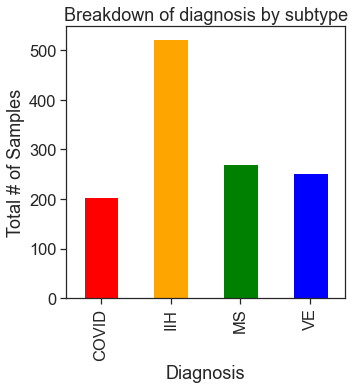

In [15]:
# First we number of samples (cells) vs. diagnosis
count_by_dx = phenos.groupby(['dx']).size()
count_by_dx.plot.bar(figsize=(5,5),legend=False,color=["red", "orange", "green", "blue"])
# setting labels make plots more informative
plt.xlabel("Diagnosis")
plt.ylabel("Total # of Samples")
# titles are important for plot interpretation!
plt.title("Breakdown of diagnosis by subtype")
plt.show()

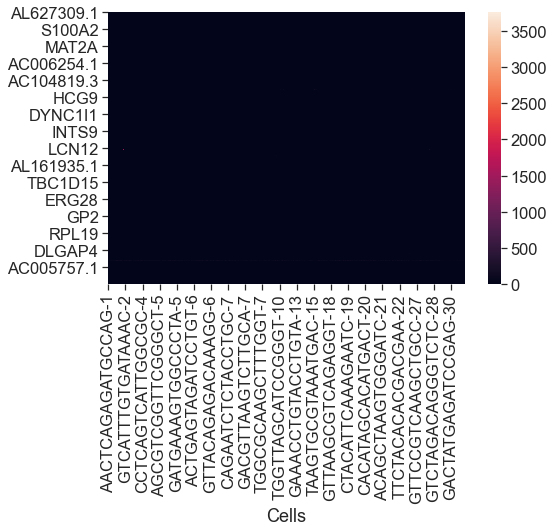

In [16]:
# We can also create a heatmap of the gene expression
# create empty figure
fig,ax = plt.subplots(figsize=(8,5))
# add heatmap
sns.heatmap(data,ax=ax)
# set informative x label
plt.xlabel("Cells")
plt.show()

In [17]:
# There are MANY genes which makes it hard to visualize the data with a heatmap
# Let's select 5 genes for plotting
data.iloc[:10,:]

AACTCAGAGATGCCAG-1  ACACCCTCAGGGTACA-1  ACGATACGTCATATCG-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL669831.5                 0.0                 0.0                 0.0   
FAM87B                     0.0                 0.0                 0.0   
LINC00115                  0.0                 0.0                 0.0   
FAM41C                     0.0                 0.0                 0.0   
AL645608.3                 0.0                 0.0                 0.0   
SAMD11                     0.0                 0.0                 0.0   
NOC2L                      0.0                 0.0                 0.0   
KLHL17                     0.0                 0.0                 0.0   
PLEKHN1                    0.0                 0.0                 0.0   

            ACGGGCTTCTGCGTAA-1  ACTTACTTCGCGCCAA-1  ATCATGGCACTGTTAG-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL669831.5                 0.0                 0.0                 0.0   
FAM87B                     0.0                 0.0                 0.0   
LINC00115                  0.0                 0.0                 0.0   
FAM41C                     0.0                 0.0                 0.0   
AL645608.3                 0.0                 0.0                 0.0   
SAMD11                     0.0                 0.0                 0.0   
NOC2L                      0.0                 0.0                 0.0   
KLHL17                     0.0                 0.0                 0.0   
PLEKHN1                    0.0                 0.0                 0.0   

            ATTGGTGGTTCGGCAC-1  CAACCAACAGGTGCCT-1  CAGCCGAGTCAGAAGC-1  \
AL627309.1                 0.0                 0.0                 0.0   
AL669831.5                 0.0                 0.0                 0.0   
FAM87B                     0.0                 0.0                 0.0   
LINC00115                  0.0                 0.0                 0.0   
FAM41C                     0.0                 0.0                 0.0   
AL645608.3                 0.0                 0.0                 0.0   
SAMD11                     0.0                 0.0                 0.0   
NOC2L                      0.0                 0.0                 0.0   
KLHL17                     0.0                 0.0                 0.0   
PLEKHN1                    0.0                 0.0                 0.0   

            CATCAAGGTAGCTCCG-1  ...  CGTGAATAGGTTACAA-31  CTAACCCAGGTACTGG-31  \
AL627309.1                 0.0  ...             0.000000                  0.0   
AL669831.5                 0.0  ...             0.000000                  0.0   
FAM87B                     0.0  ...             0.000000                  0.0   
LINC00115                  0.0  ...             3.313453                  0.0   
FAM41C                     0.0  ...             0.000000                  0.0   
AL645608.3                 0.0  ...             0.000000                  0.0   
SAMD11                     0.0  ...             0.000000                  0.0   
NOC2L                      0.0  ...             0.000000                  0.0   
KLHL17                     0.0  ...             0.000000                  0.0   
PLEKHN1                    0.0  ...             0.000000                  0.0   

            CTCAAGAGTTCCGCAG-31  GCCAACGAGCTTCATG-31  GTTACGAGTGGACCAA-31  \
AL627309.1                  0.0                  0.0                  0.0   
AL669831.5                  0.0                  0.0                  0.0   
FAM87B                      0.0                  0.0                  0.0   
LINC00115                   0.0                  0.0                  0.0   
FAM41C                      0.0                  0.0                  0.0   
AL645608.3                  0.0                  0.0                  0.0   
SAMD11                      0.0                  0.0                  0.0   
NOC2L                       0.0                  0.0       

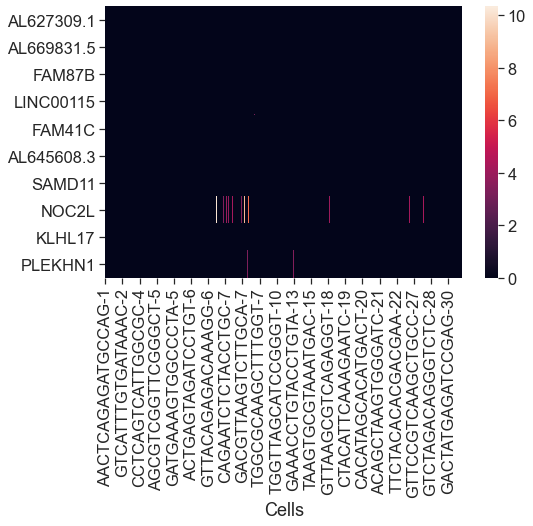

In [18]:
# Now we can plot!
# -- Are these heat maps random?
sub_data = data.iloc[:10,:]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data,ax=ax)
plt.xlabel("Cells")
plt.show()

In [19]:
# If we have a gene list we can also extract from a pandas dataframe
gene_list = ["LYZ","CD52","IL7R","CD14","CX3CR1"]
data.loc[gene_list,:]

AACTCAGAGATGCCAG-1  ACACCCTCAGGGTACA-1  ACGATACGTCATATCG-1  \
LYZ               0.000000            0.000000            6.377551   
CD52              4.904365           22.712524           12.755102   
IL7R              4.904365            6.489293            3.188776   
CD14              9.808730            0.000000            3.188776   
CX3CR1            0.000000            0.000000            0.000000   

        ACGGGCTTCTGCGTAA-1  ACTTACTTCGCGCCAA-1  ATCATGGCACTGTTAG-1  \
LYZ               4.262575            0.000000            12.76053   
CD52              4.262575            4.235493             0.00000   
IL7R              0.000000            0.000000             0.00000   
CD14              4.262575            0.000000             0.00000   
CX3CR1            0.000000            0.000000             0.00000   

        ATTGGTGGTTCGGCAC-1  CAACCAACAGGTGCCT-1  CAGCCGAGTCAGAAGC-1  \
LYZ               3.313453            0.000000            19.79414   
CD52              6.626905            4.304778             0.00000   
IL7R              0.000000            0.000000             0.00000   
CD14              0.000000            0.000000             0.00000   
CX3CR1            0.000000            0.000000             0.00000   

        CATCAAGGTAGCTCCG-1  ...  CGTGAATAGGTTACAA-31  CTAACCCAGGTACTGG-31  \
LYZ                6.73174  ...              0.00000             0.000000   
CD52              13.46348  ...              0.00000            10.893246   
IL7R               3.36587  ...             13.25381             5.446623   
CD14               0.00000  ...              0.00000             0.000000   
CX3CR1             0.00000  ...              0.00000             0.000000   

        CTCAAGAGTTCCGCAG-31  GCCAACGAGCTTCATG-31  GTTACGAGTGGACCAA-31  \
LYZ                0.000000             0.000000             0.000000   
CD52              10.504202            10.660981            11.223345   
IL7R               5.252101             5.330490             5.611672   
CD14               0.000000             0.000000             0.000000   
CX3CR1             0.000000             0.000000             0.000000   

        TCAGTGACAGCTGTAT-31  TGAATCGCAGATCCAT-31  TTCTGTAAGTCAGAGC-31  \
LYZ                0.000000             0.000000            15.665800   
CD52              10.934937             4.081633             5.221932   
IL7R               5.467469             0.000000             5.221932   
CD14               0.000000             0.000000             0.000000   
CX3CR1             0.000000             0.000000             0.000000   

        TTCTTCCAGTCACGAG-31  TTTGATCCAGTGTGCC-31  
LYZ                0.000000             0.000000  
CD52              10.576415            10.982976  
IL7R               5.288207             5.491488  
CD14               0.000000             0.000000  
CX3CR1             0.000000             0.000000  

[5 rows x 1250 columns]

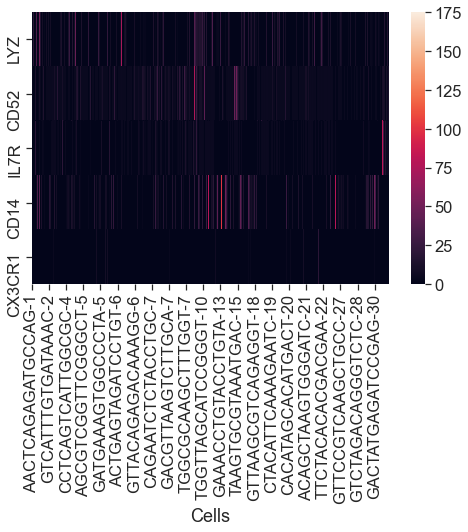

In [20]:
# Now we can plot!
# data.loc uses labels not indexes
sub_data_2 = data.loc[gene_list,:]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data_2,ax=ax)
plt.xlabel("Cells")
plt.show()

In [21]:
# We can also use pandas to find the genes with the highest variance across samples
# -- What is variance in the gene expression context?
# 0 variance means every cell has same amount of that gene expressed
# If there's a high variance, that gene 
data_var = data.var(axis=1).sort_values(ascending=False)
print(data_var)
print("\n") # start a new block
print("Our data type")
print(type(data_var)) # This is known as a series in python

MALAT1        44125.812145
FTL           32370.710293
TMSB4X        20630.434415
FTH1          19771.523916
HBB            9059.618003
                  ...     
AL590708.1        0.000000
DNM1              0.000000
AL359091.4        0.000000
CERCAM            0.000000
C8G               0.000000
Length: 21295, dtype: float64


Our data type
<class 'pandas.core.series.Series'>


In [22]:
# In a series we can separate indices
print(data_var.index) # gene names and values
print("\n")
print(data_var.values) # expression variance

Index(['MALAT1', 'FTL', 'TMSB4X', 'FTH1', 'HBB', 'TPT1', 'ACTB', 'EEF1A1',
       'B2M', 'DEFA3',
       ...
       'STXBP1', 'CFAP157', 'AL162586.1', 'AL157935.2', 'AL157935.1',
       'AL590708.1', 'DNM1', 'AL359091.4', 'CERCAM', 'C8G'],
      dtype='object', length=21295)


[44125.81214497 32370.71029267 20630.43441458 ...     0.
     0.             0.        ]


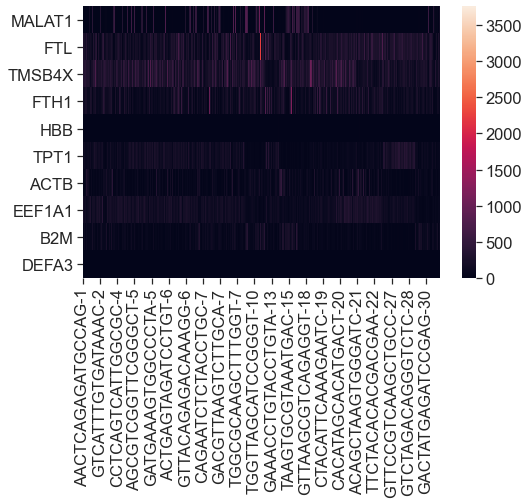

In [23]:
# Make heatmap of top 10 genes with highest variance across samples (cells)
topgenes = data.var(axis=1).sort_values(ascending=False).index[:10] #axis = 1 is across, =0 is vertical/cols

sub_data = data.loc[topgenes, :]
fig,ax = plt.subplots(figsize=(8,5))
sns.heatmap(sub_data)
plt.show()

In [24]:
#boolean indexing
#finds all the values that are COVID in the data set
# Looks at the genes associated with "COVID"
phenos[phenos["dx"] == "COVID"].head() 

orig.ident  nCount_RNA  nFeature_RNA  percent.mt cluster  \
AAAGCAACAAGGACTG-21   immunity         686           260         0.0   mono2   
AACCGCGGTCGGGTCT-21   immunity         551           247         0.0   mono2   
ACAGCTAAGTGGGATC-21   immunity         549           207         0.0   mono2   
ACCAGTACAGCTATTG-21   immunity         945           338         0.0   mono2   
CATGGCGTCGCTAGCG-21   immunity         550           219         0.0   mono2   

                        dx  patient  nCount_SCT  nFeature_SCT  \
AAAGCAACAAGGACTG-21  COVID  COV1919        2075           339   
AACCGCGGTCGGGTCT-21  COVID  COV1919        2026           352   
ACAGCTAAGTGGGATC-21  COVID  COV1919        2052           315   
ACCAGTACAGCTATTG-21  COVID  COV1919        2186           396   
CATGGCGTCGCTAGCG-21  COVID  COV1919        2045           323   

                     SCT_snn_res.0.2  seurat_clusters  
AAAGCAACAAGGACTG-21                3                3  
AACCGCGGTCGGGTCT-21                3                3  
ACAGCTAAGTGGGATC-21                3                3  
ACCAGTACAGCTATTG-21                3                3  
CATGGCGTCGCTAGCG-21                3                3

In [25]:
# -- Index of all genes associated with the neuroimmune condition?
patient_id_COVID = list(phenos[phenos["dx"] == "COVID"].index)
patient_id_IIH = list(phenos[phenos["dx"] == "IIH"].index)
patient_id_MS = list(phenos[phenos["dx"] == "MS"].index)
patient_id_VE = list(phenos[phenos["dx"] == "VE"].index)

In [26]:
# split gene expression data into different diagnosis categories
patient_id_COVID

['AAAGCAACAAGGACTG-21',
 'AACCGCGGTCGGGTCT-21',
 'ACAGCTAAGTGGGATC-21',
 'ACCAGTACAGCTATTG-21',
 'CATGGCGTCGCTAGCG-21',
 'CCAATCCTCGGAGCAA-21',
 'CCTAAAGCACTTAAGC-21',
 'CGTAGGCGTAGCAAAT-21',
 'CGTCAGGCACCGGAAA-21',
 'CTACATTTCCTCAATT-21',
 'CTCGGAGAGACATAAC-21',
 'GATCGATCAAGCCTAT-21',
 'GCAAACTAGCGTGAGT-21',
 'GCAGTTACACGAAAGC-21',
 'GCAGTTATCTTTAGGG-21',
 'GGATGTTTCACCAGGC-21',
 'GGCGTGTTCGCACTCT-21',
 'TACTTACCATAAAGGT-21',
 'TCAGCAATCCATGAGT-21',
 'TCGTACCGTCGAGATG-21',
 'TCTTCGGGTTGTCTTT-21',
 'TGAGCCGTCTAACGGT-21',
 'TGAGGGATCTCGATGA-21',
 'TGGCGCAAGCTTATCG-21',
 'TGGGCGTTCCTCTAGC-21',
 'ACCAGTACACCTCGTT-22',
 'ACCCACTCACATCCGG-22',
 'ACTGCTCGTCTCCACT-22',
 'AGAGTGGAGAGTCTGG-22',
 'AGGCCACTCGGAGCAA-22',
 'AGTGTCACACTTCTGC-22',
 'ATCTGCCAGTGCGATG-22',
 'ATTCTACCAGGTCTCG-22',
 'ATTTCTGAGCACACAG-22',
 'CAAGGCCCATTAGGCT-22',
 'CACACCTTCTTGCAAG-22',
 'CCAGCGAAGCGATGAC-22',
 'CGCGTTTGTTTGGCGC-22',
 'CGTTAGATCTCCAGGG-22',
 'CTGTTTATCCTAGAAC-22',
 'GAACCTACACCGTTGG-22',
 'GAACGGAGTACACC

In [27]:
# -- iloc uses indexes, not labels?
# -- Replace iloc with loc?
expr_COVID = data.loc[:,patient_id_COVID]
expr_IIH = data.loc[:,patient_id_IIH]
expr_MS = data.loc[:,patient_id_MS]
expr_VE = data.loc[:,patient_id_VE]
expr_COVID.head()

AAAGCAACAAGGACTG-21  AACCGCGGTCGGGTCT-21  ACAGCTAAGTGGGATC-21  \
AL627309.1                  0.0                  0.0                  0.0   
AL669831.5                  0.0                  0.0                  0.0   
FAM87B                      0.0                  0.0                  0.0   
LINC00115                   0.0                  0.0                  0.0   
FAM41C                      0.0                  0.0                  0.0   

            ACCAGTACAGCTATTG-21  CATGGCGTCGCTAGCG-21  CCAATCCTCGGAGCAA-21  \
AL627309.1                  0.0                  0.0                  0.0   
AL669831.5                  0.0                  0.0                  0.0   
FAM87B                      0.0                  0.0                  0.0   
LINC00115                   0.0                  0.0                  0.0   
FAM41C                      0.0                  0.0                  0.0   

            CCTAAAGCACTTAAGC-21  CGTAGGCGTAGCAAAT-21  CGTCAGGCACCGGAAA-21  \
AL627309.1                  0.0                  0.0                  0.0   
AL669831.5                  0.0                  0.0                  0.0   
FAM87B                      0.0                  0.0                  0.0   
LINC00115                   0.0                  0.0                  0.0   
FAM41C                      0.0                  0.0                  0.0   

            CTACATTTCCTCAATT-21  ...  TCCTAATCATCTTTCA-28  \
AL627309.1                  0.0  ...                  0.0   
AL669831.5                  0.0  ...                  0.0   
FAM87B                      0.0  ...                  0.0   
LINC00115                   0.0  ...                  0.0   
FAM41C                      0.0  ...                  0.0   

            TCGACCTAGGATGGCT-28  TCGTCCAGTGAGATTA-28  TCTAACTGTTGGTGTT-28  \
AL627309.1                  0.0                  0.0                  0.0   
AL669831.5                  0.0                  0.0                  0.0   
FAM87B                      0.0                  0.0                  0.0   
LINC00115                   0.0                  0.0                  0.0   
FAM41C                      0.0                  0.0                  0.0   

            TGACCCTAGAACTTCC-28  TGAGGGATCAAATGCC-28  TTCATGTCACACACTA-28  \
AL627309.1                  0.0                  0.0                  0.0   
AL669831.5                  0.0                  0.0                  0.0   
FAM87B                      0.0                  0.0                  0.0   
LINC00115                   0.0                  0.0                  0.0   
FAM41C                      0.0                  0.0                  0.0   

            TTGACCCGTTCCCACT-28  TTGCTGCGTGTCCTAA-28  TTGGGATTCCAAACCA-28  
AL627309.1                  0.0                  0.0                  0.0  
AL669831.5                  0.0                  0.0                  0.0  
FAM87B                      0.0                  0.0                  0.0  
LINC00115                   0.0                  0.0                  0.0  
FAM41C                      0.0                  0.0                  0.0  

[5 rows x 205 columns]

In [28]:
# check we generated the correct dataframes (i.e. number of columns should match number of samples)
# -- Why do they all start with (21295, )?
# --- Possible answer: the number of genes stays the same
print(data.shape)
print(expr_COVID.shape)
print(expr_IIH.shape)
print(expr_MS.shape)
print(expr_VE.shape)

(21295, 1250)
(21295, 205)
(21295, 522)
(21295, 270)
(21295, 253)


In [29]:
# This code is used to compute the z-score for each gene
# A Z-score helps us assess differential expression between 2 conditions (e.g. diagnosis)
# To make things simple, let's compare COVID cases with VE (closest clinical symptoms)

# Calculate the mean expression of each gene across subtypes
m_COVID = np.transpose(expr_COVID).mean()
m_VE = np.transpose(expr_VE).mean()

# Calculate the variance 
v_COVID = np.transpose(expr_COVID).var()
v_VE = np.transpose(expr_VE).var()

# Get the number of each condition
n_COVID = expr_COVID.shape[1]
n_VE = expr_VE.shape[1]

# Calculate the z-score
# z > 0 means gene expression is higher in COVID
# z < 0 means gene expression is higher in VE

# Like standard deviation
z = (m_COVID-m_VE)/np.sqrt(v_COVID/n_COVID + v_VE/n_VE)
print(z)

AL627309.1         NaN
AL669831.5    1.000000
FAM87B             NaN
LINC00115    -1.000000
FAM41C             NaN
                ...   
AL354822.1         NaN
AC004556.1   -0.104358
AC233755.2         NaN
AC233755.1         NaN
AC240274.1         NaN
Length: 21295, dtype: float64


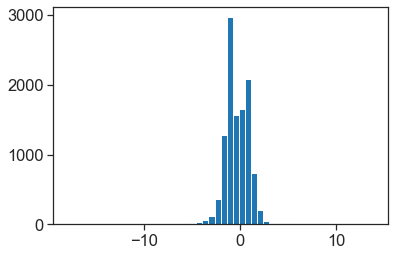

In [30]:
# We can plot the distribution of the z-scores
# -- What does this show?
# Z-Score crowds around 0
plt.hist(z,bins=50)
plt.show()

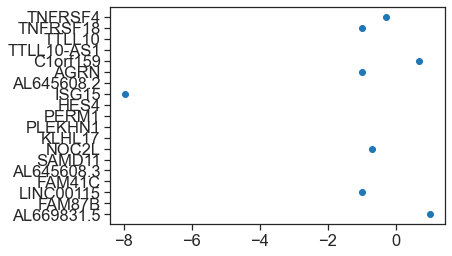

In [31]:
# We can also make a scatter plot of the z-scores for 20 genes 
plt.scatter(z[:20].values,z[:20].index)
plt.show()
# Doesn't plot all 20 because there are many NaN values-- confirm this!
# After, either 1) drop values 2) impute values by plugging in an average number

In [32]:
# Find 5 most differentially expressed genes between COVID and VE
diff_genes = z.abs().sort_values(ascending=False)[:5].index
# to visualize we want to order patients based on their true label
ordered_ids = np.append(patient_id_COVID,patient_id_VE)
print(ordered_ids)

['AAAGCAACAAGGACTG-21' 'AACCGCGGTCGGGTCT-21' 'ACAGCTAAGTGGGATC-21'
 'ACCAGTACAGCTATTG-21' 'CATGGCGTCGCTAGCG-21' 'CCAATCCTCGGAGCAA-21'
 'CCTAAAGCACTTAAGC-21' 'CGTAGGCGTAGCAAAT-21' 'CGTCAGGCACCGGAAA-21'
 'CTACATTTCCTCAATT-21' 'CTCGGAGAGACATAAC-21' 'GATCGATCAAGCCTAT-21'
 'GCAAACTAGCGTGAGT-21' 'GCAGTTACACGAAAGC-21' 'GCAGTTATCTTTAGGG-21'
 'GGATGTTTCACCAGGC-21' 'GGCGTGTTCGCACTCT-21' 'TACTTACCATAAAGGT-21'
 'TCAGCAATCCATGAGT-21' 'TCGTACCGTCGAGATG-21' 'TCTTCGGGTTGTCTTT-21'
 'TGAGCCGTCTAACGGT-21' 'TGAGGGATCTCGATGA-21' 'TGGCGCAAGCTTATCG-21'
 'TGGGCGTTCCTCTAGC-21' 'ACCAGTACACCTCGTT-22' 'ACCCACTCACATCCGG-22'
 'ACTGCTCGTCTCCACT-22' 'AGAGTGGAGAGTCTGG-22' 'AGGCCACTCGGAGCAA-22'
 'AGTGTCACACTTCTGC-22' 'ATCTGCCAGTGCGATG-22' 'ATTCTACCAGGTCTCG-22'
 'ATTTCTGAGCACACAG-22' 'CAAGGCCCATTAGGCT-22' 'CACACCTTCTTGCAAG-22'
 'CCAGCGAAGCGATGAC-22' 'CGCGTTTGTTTGGCGC-22' 'CGTTAGATCTCCAGGG-22'
 'CTGTTTATCCTAGAAC-22' 'GAACCTACACCGTTGG-22' 'GAACGGAGTACACCGC-22'
 'GAATAAGGTTGAGTTC-22' 'GACGCGTGTCGCGTGT-22' 'GACGTTAAGACTTGAA

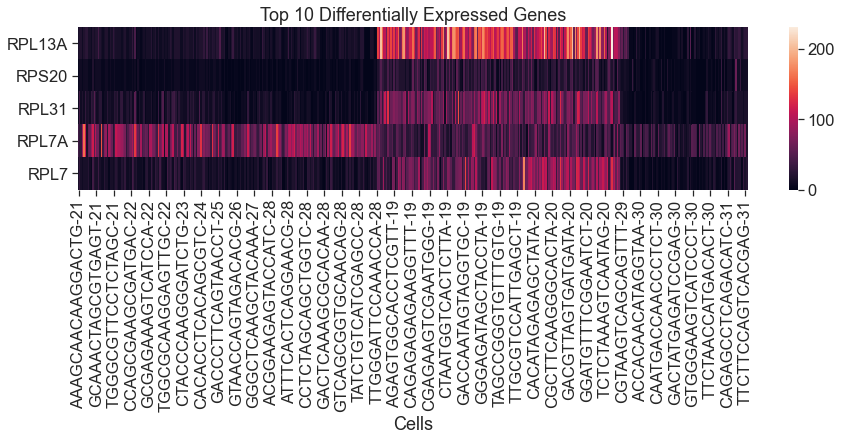

In [33]:
# ready to plot!
fig,ax = plt.subplots(figsize=(15,3))

diff_data = data.loc[diff_genes,:]
diff_data = diff_data.loc[:,ordered_ids]

sns.heatmap(diff_data,ax=ax)
plt.xlabel("Cells")
plt.title("Top 10 Differentially Expressed Genes")
plt.show()

In [34]:
data.T.head() # transpose x and y 
# Now columns are the cell barcodes

AL627309.1  AL669831.5  FAM87B  LINC00115  FAM41C  \
AACTCAGAGATGCCAG-1         0.0         0.0     0.0        0.0     0.0   
ACACCCTCAGGGTACA-1         0.0         0.0     0.0        0.0     0.0   
ACGATACGTCATATCG-1         0.0         0.0     0.0        0.0     0.0   
ACGGGCTTCTGCGTAA-1         0.0         0.0     0.0        0.0     0.0   
ACTTACTTCGCGCCAA-1         0.0         0.0     0.0        0.0     0.0   

                    AL645608.3  SAMD11  NOC2L  KLHL17  PLEKHN1  ...  \
AACTCAGAGATGCCAG-1         0.0     0.0    0.0     0.0      0.0  ...   
ACACCCTCAGGGTACA-1         0.0     0.0    0.0     0.0      0.0  ...   
ACGATACGTCATATCG-1         0.0     0.0    0.0     0.0      0.0  ...   
ACGGGCTTCTGCGTAA-1         0.0     0.0    0.0     0.0      0.0  ...   
ACTTACTTCGCGCCAA-1         0.0     0.0    0.0     0.0      0.0  ...   

                    AC145212.1  MAFIP  AC011043.1  AL592183.1  AC007325.4  \
AACTCAGAGATGCCAG-1         0.0    0.0         0.0         0.0         0.0   
ACACCCTCAGGGTACA-1         0.0    0.0         0.0         0.0         0.0   
ACGATACGTCATATCG-1         0.0    0.0         0.0         0.0         0.0   
ACGGGCTTCTGCGTAA-1         0.0    0.0         0.0         0.0         0.0   
ACTTACTTCGCGCCAA-1         0.0    0.0         0.0         0.0         0.0   

                    AL354822.1  AC004556.1  AC233755.2  AC233755.1  AC240274.1  
AACTCAGAGATGCCAG-1         0.0         0.0         0.0         0.0         0.0  
ACACCCTCAGGGTACA-1         0.0         0.0         0.0         0.0         0.0  
ACGATACGTCATATCG-1         0.0         0.0         0.0         0.0         0.0  
ACGGGCTTCTGCGTAA-1         0.0         0.0         0.0         0.0         0.0  
ACTTACTTCGCGCCAA-1         0.0         0.0         0.0         0.0         0.0  

[5 rows x 21295 columns]

In [35]:
# PCA
# -- What is PCA?
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(data.T)

PCA(n_components=2)

In [36]:
x_pca = pd.DataFrame(pca.transform(data.T),columns = ["PC1","PC2"],index=data.columns)
x_pca

PC1         PC2
AACTCAGAGATGCCAG-1    39.302192  121.603045
ACACCCTCAGGGTACA-1  -214.609360 -191.347028
ACGATACGTCATATCG-1  -177.924994 -194.889051
ACGGGCTTCTGCGTAA-1    65.022806 -119.921017
ACTTACTTCGCGCCAA-1   152.666695  -88.647598
...                         ...         ...
TCAGTGACAGCTGTAT-31 -294.407316   75.418711
TGAATCGCAGATCCAT-31   39.184958  158.373143
TTCTGTAAGTCAGAGC-31 -144.205994   16.099455
TTCTTCCAGTCACGAG-31 -219.234871  -24.485390
TTTGATCCAGTGTGCC-31 -228.761739   78.078104

[1250 rows x 2 columns]

In [37]:
x_pca.shape

(1250, 2)

In [38]:
# Add a column showing the associated disease
x_pca["dx"] = list(phenos["dx"])
x_pca

PC1         PC2  dx
AACTCAGAGATGCCAG-1    39.302192  121.603045  MS
ACACCCTCAGGGTACA-1  -214.609360 -191.347028  MS
ACGATACGTCATATCG-1  -177.924994 -194.889051  MS
ACGGGCTTCTGCGTAA-1    65.022806 -119.921017  MS
ACTTACTTCGCGCCAA-1   152.666695  -88.647598  MS
...                         ...         ...  ..
TCAGTGACAGCTGTAT-31 -294.407316   75.418711  VE
TGAATCGCAGATCCAT-31   39.184958  158.373143  VE
TTCTGTAAGTCAGAGC-31 -144.205994   16.099455  VE
TTCTTCCAGTCACGAG-31 -219.234871  -24.485390  VE
TTTGATCCAGTGTGCC-31 -228.761739   78.078104  VE

[1250 rows x 3 columns]

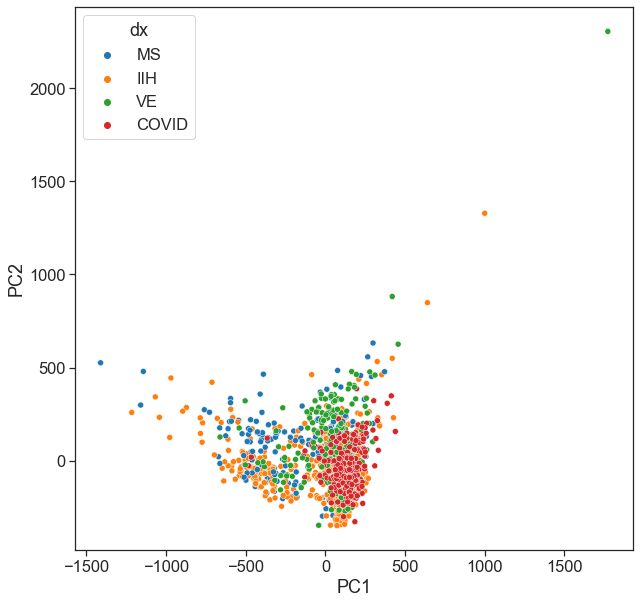

In [39]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = "PC1", y = "PC2",hue="dx",data=x_pca,ax=ax)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show() # looks like PC1 and PC2 are not enough to separate the different conditions!
# COVID and VE are grouped together

In [40]:
## QC and data cleanup ##
# Step 1: check for missing values

# what happens when you run data.isna().all() or data.isna().any(axis=1)
data.isna().any()

AACTCAGAGATGCCAG-1     False
ACACCCTCAGGGTACA-1     False
ACGATACGTCATATCG-1     False
ACGGGCTTCTGCGTAA-1     False
ACTTACTTCGCGCCAA-1     False
                       ...  
TCAGTGACAGCTGTAT-31    False
TGAATCGCAGATCCAT-31    False
TTCTGTAAGTCAGAGC-31    False
TTCTTCCAGTCACGAG-31    False
TTTGATCCAGTGTGCC-31    False
Length: 1250, dtype: bool

In [41]:
data.isna().all()

AACTCAGAGATGCCAG-1     False
ACACCCTCAGGGTACA-1     False
ACGATACGTCATATCG-1     False
ACGGGCTTCTGCGTAA-1     False
ACTTACTTCGCGCCAA-1     False
                       ...  
TCAGTGACAGCTGTAT-31    False
TGAATCGCAGATCCAT-31    False
TTCTGTAAGTCAGAGC-31    False
TTCTTCCAGTCACGAG-31    False
TTTGATCCAGTGTGCC-31    False
Length: 1250, dtype: bool

In [42]:
data.isna().any(axis=1) # axis=1: gene expression, not cell barcode

AL627309.1    False
AL669831.5    False
FAM87B        False
LINC00115     False
FAM41C        False
              ...  
AL354822.1    False
AC004556.1    False
AC233755.2    False
AC233755.1    False
AC240274.1    False
Length: 21295, dtype: bool

In [43]:
phenos.isnull().values.any() # there are some NaN labels --> discard data with no labels!

False

In [44]:
# Rows (cells) that include NaN as their "dx"
index = phenos.loc[pd.isna(phenos["dx"]), :].index
index

Index([], dtype='object')

In [45]:
# drop rows in phenos with no dx label
phenos = phenos.drop(index)
# check dataframe size
phenos.shape

(1250, 11)

In [46]:
# step 2: reformat data
data = data.T
data

AL627309.1  AL669831.5  FAM87B  LINC00115  FAM41C  \
AACTCAGAGATGCCAG-1          0.0         0.0     0.0        0.0     0.0   
ACACCCTCAGGGTACA-1          0.0         0.0     0.0        0.0     0.0   
ACGATACGTCATATCG-1          0.0         0.0     0.0        0.0     0.0   
ACGGGCTTCTGCGTAA-1          0.0         0.0     0.0        0.0     0.0   
ACTTACTTCGCGCCAA-1          0.0         0.0     0.0        0.0     0.0   
...                         ...         ...     ...        ...     ...   
TCAGTGACAGCTGTAT-31         0.0         0.0     0.0        0.0     0.0   
TGAATCGCAGATCCAT-31         0.0         0.0     0.0        0.0     0.0   
TTCTGTAAGTCAGAGC-31         0.0         0.0     0.0        0.0     0.0   
TTCTTCCAGTCACGAG-31         0.0         0.0     0.0        0.0     0.0   
TTTGATCCAGTGTGCC-31         0.0         0.0     0.0        0.0     0.0   

                     AL645608.3  SAMD11  NOC2L  KLHL17  PLEKHN1  ...  \
AACTCAGAGATGCCAG-1          0.0     0.0    0.0     0.0      0.0  ...   
ACACCCTCAGGGTACA-1          0.0     0.0    0.0     0.0      0.0  ...   
ACGATACGTCATATCG-1          0.0     0.0    0.0     0.0      0.0  ...   
ACGGGCTTCTGCGTAA-1          0.0     0.0    0.0     0.0      0.0  ...   
ACTTACTTCGCGCCAA-1          0.0     0.0    0.0     0.0      0.0  ...   
...                         ...     ...    ...     ...      ...  ...   
TCAGTGACAGCTGTAT-31         0.0     0.0    0.0     0.0      0.0  ...   
TGAATCGCAGATCCAT-31         0.0     0.0    0.0     0.0      0.0  ...   
TTCTGTAAGTCAGAGC-31         0.0     0.0    0.0     0.0      0.0  ...   
TTCTTCCAGTCACGAG-31         0.0     0.0    0.0     0.0      0.0  ...   
TTTGATCCAGTGTGCC-31         0.0     0.0    0.0     0.0      0.0  ...   

                     AC145212.1  MAFIP  AC011043.1  AL592183.1  AC007325.4  \
AACTCAGAGATGCCAG-1          0.0    0.0         0.0         0.0         0.0   
ACACCCTCAGGGTACA-1          0.0    0.0         0.0         0.0         0.0   
ACGATACGTCATATCG-1          0.0    0.0         0.0         0.0         0.0   
ACGGGCTTCTGCGTAA-1          0.0    0.0         0.0         0.0         0.0   
ACTTACTTCGCGCCAA-1          0.0    0.0         0.0         0.0         0.0   
...                         ...    ...         ...         ...         ...   
TCAGTGACAGCTGTAT-31         0.0    0.0         0.0         0.0         0.0   
TGAATCGCAGATCCAT-31         0.0    0.0         0.0         0.0         0.0   
TTCTGTAAGTCAGAGC-31         0.0    0.0         0.0         0.0         0.0   
TTCTTCCAGTCACGAG-31         0.0    0.0         0.0         0.0         0.0   
TTTGATCCAGTGTGCC-31         0.0    0.0         0.0         0.0         0.0   

                     AL354822.1  AC004556.1  AC233755.2  AC233755.1  \
AACTCAGAGATGCCAG-1          0.0         0.0         0.0         0.0   
ACACCCTCAGGGTACA-1          0.0         0.0         0.0         0.0   
ACGATACGTCATATCG-1          0.0         0.0         0.0         0.0   
ACGGGCTTCTGCGTAA-1          0.0         0.0         0.0         0.0   
ACTTACTTCGCGCCAA-1          0.0         0.0         0.0         0.0   
...                         ...         ...         ...         ...   
TCAGTGACAGCTGTAT-31         0.0         0.0         0.0         0.0   
TGAATCGCAGATCCAT-31         0.0         0.0         0.0         0.0   
TTCTGTAAGTCAGAGC-31         0.0         0.0         0.0         0.0   
TTCTTCCAGTCACGAG-31         0.0         0.0         0.0         0.0   
TTTGATCCAGTGTGCC-31         0.0         0.0         0.0         0.0   

                     AC240274.1  
AACTCAGAGATGCCAG-1          0.0  
ACACCCTCAGGGTACA-1          0.0  
ACGATACGTCATATCG-1          0.0  
ACGGGCTTCTGCGTAA-1          0.0  
ACTTACTTCGCGCCAA-1          0.0  
...                         ...  
TCAGTGACAGCTGTAT-31         0.0  
TGAATCGCAGATCCAT-31         0.0  
TTCTGTAAGTCAGAGC-31         0.0  
TTCTTCCAGTCACGAG-31         0.0  
TTTGATCCAGTGTGCC-31         0.0  

[1250 rows x 21295 columns]

In [47]:
# drop rows in data with no dx label
data = data.drop(index)
# check dataframe size
data.shape

(1250, 21295)

In [48]:
phenos.shape[0] == data.shape[0] # check the correct number of rows are dropped from both data and phenos

True

In [49]:
# step 3: split data into training and testing sets
from sklearn.model_selection import train_test_split

# reload phenos, using cell barcode as index name
phenos_diag = list(phenos["dx"]) # only use the diagnosis column as label

# Split up the X (data) and y (phenos) datasets into train and test sets
# 25% of the dataset will be used for the test set
X_train, X_test, y_train, y_test = train_test_split(data,phenos_diag,stratify=phenos_diag,
                                                    test_size=0.25,random_state=35,)

In [50]:
from pandas import DataFrame
y_train = DataFrame(y_train,columns=['dx']) #turn list into dataframe
y_test = DataFrame(y_test,columns=['dx'])

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_train.head()

(937, 21295)
(313, 21295)
(937, 1)
(313, 1)


dx
0    IIH
1  COVID
2     VE
3    IIH
4     VE

In [51]:
# ignore warnings
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [52]:
# Make sure there are no NaN values
data.isna().values.any() 

False

In [53]:
# Make sure there are no null values
data.isnull().values.any() 

False

In [54]:
# Look at the training's data distribution of the four neuroimmune diseases
y_train.groupby("dx").size()
print(154/391) # 0.3938618925831202

0.3938618925831202


In [55]:
y_test.groupby("dx").size()
print(51/131) # 0.3893129770992366

0.3893129770992366


In [56]:
## Decision Tree ##

# sklearn has these classifiers built in
from sklearn.tree import DecisionTreeClassifier

# Initialize the classifier with a max_depth of 5 -- defining our model
classifier = DecisionTreeClassifier(max_depth=5,random_state=35) # max features is 5

# Fit the classifier to the training set
classifier = classifier.fit(X_train, y_train)

In [57]:
from sklearn import tree
# conda install -c anaconda python-graphviz
import graphviz

dot_data = tree.export_graphviz(classifier, out_file=None, impurity=False) 
graph = graphviz.Source(dot_data) 
graph # brief note: 994.0 is the expression value

ModuleNotFoundError: No module named 'graphviz'

AttributeError: 'DecisionTreeClassifier' object has no attribute 'render'

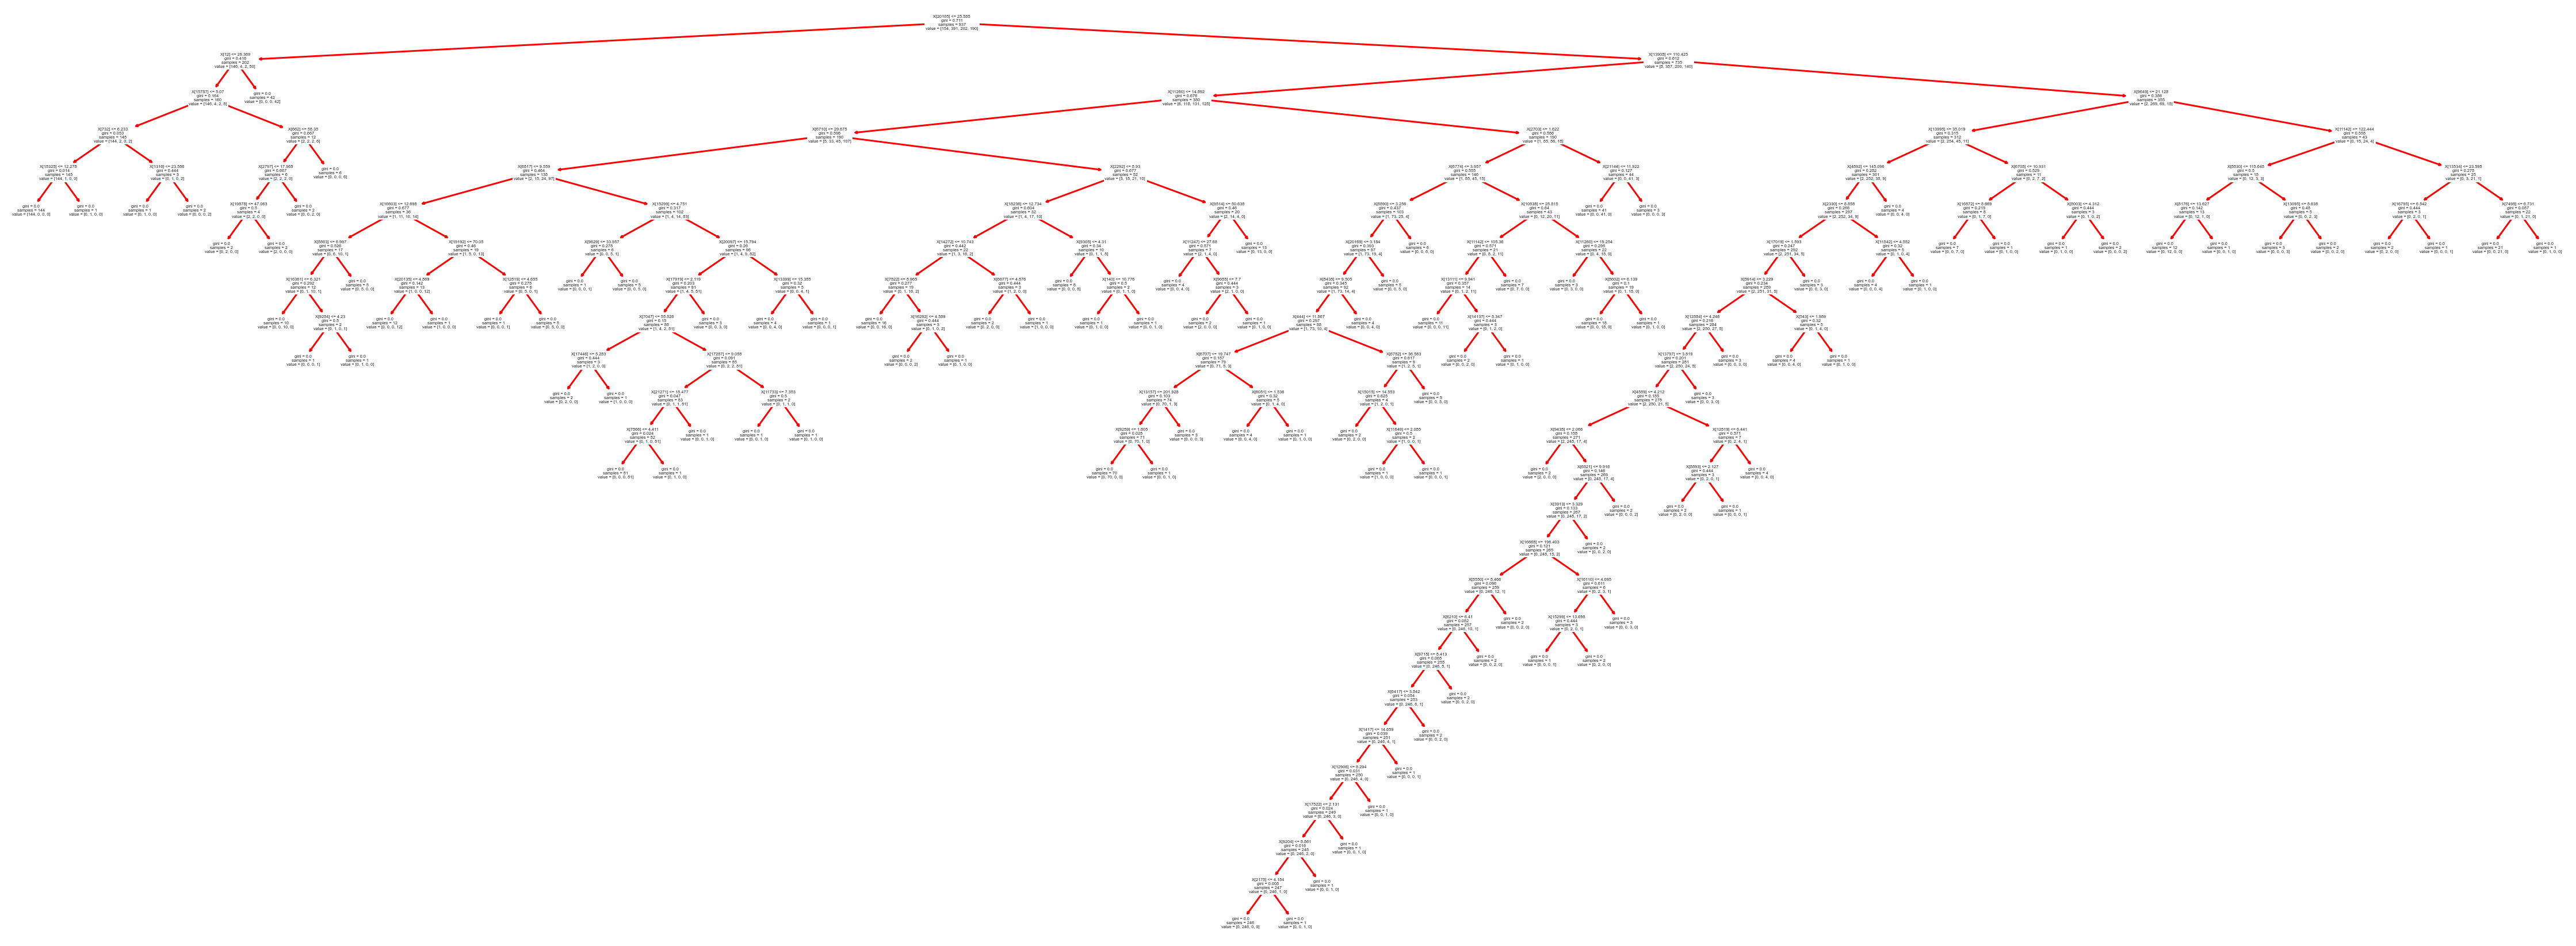

In [58]:
from matplotlib import pyplot as plt
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train, y_train)
fig, ax = plt.subplots(figsize=(80,30))
out = tree.plot_tree(clf)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('red')
        arrow.set_linewidth(3)
        
clf.format = 'png'
clf.render('dtree',view=True)

In [59]:
# create heatmap showing gene expression
# 20105, 13908, 12
X_train.iloc[:,20105].name # select gene in the first node / root node
# CHANGE

'RPL13A'

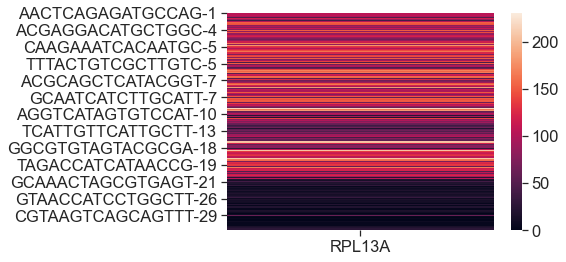

In [60]:
# Show how much RPL7 is expressed in all cells
# Look at additional genes in the tree
model_gene = data.loc[:, ['RPL13A']]
sns.heatmap(model_gene)
plt.show()

In [61]:
# test decision tree model
# Create a list of predicted classes for each of the examples in the test set
y_predict = classifier.predict(X_test) 

print(y_predict) # outputs are labels for our testing data

['VE' 'MS' 'VE' 'VE' 'IIH' 'IIH' 'IIH' 'MS' 'IIH' 'IIH' 'MS' 'IIH' 'VE'
 'IIH' 'VE' 'COVID' 'IIH' 'VE' 'IIH' 'IIH' 'COVID' 'IIH' 'IIH' 'MS' 'MS'
 'MS' 'IIH' 'IIH' 'MS' 'IIH' 'IIH' 'COVID' 'IIH' 'COVID' 'MS' 'MS' 'IIH'
 'IIH' 'IIH' 'IIH' 'MS' 'IIH' 'COVID' 'MS' 'MS' 'VE' 'IIH' 'IIH' 'VE'
 'IIH' 'COVID' 'IIH' 'VE' 'IIH' 'IIH' 'MS' 'IIH' 'VE' 'VE' 'MS' 'IIH' 'MS'
 'VE' 'IIH' 'MS' 'IIH' 'MS' 'IIH' 'COVID' 'MS' 'IIH' 'COVID' 'VE' 'VE'
 'MS' 'MS' 'IIH' 'IIH' 'IIH' 'COVID' 'IIH' 'VE' 'IIH' 'IIH' 'IIH' 'IIH'
 'VE' 'IIH' 'IIH' 'IIH' 'VE' 'IIH' 'IIH' 'IIH' 'MS' 'IIH' 'IIH' 'IIH'
 'COVID' 'VE' 'MS' 'MS' 'IIH' 'VE' 'IIH' 'VE' 'IIH' 'VE' 'COVID' 'VE'
 'COVID' 'MS' 'IIH' 'VE' 'MS' 'MS' 'IIH' 'IIH' 'COVID' 'IIH' 'IIH' 'IIH'
 'IIH' 'VE' 'IIH' 'VE' 'IIH' 'VE' 'MS' 'MS' 'COVID' 'VE' 'IIH' 'IIH' 'VE'
 'IIH' 'IIH' 'IIH' 'MS' 'MS' 'IIH' 'VE' 'IIH' 'COVID' 'VE' 'IIH' 'IIH'
 'IIH' 'IIH' 'VE' 'VE' 'IIH' 'COVID' 'IIH' 'VE' 'MS' 'IIH' 'IIH' 'IIH'
 'COVID' 'IIH' 'IIH' 'MS' 'IIH' 'IIH' 'COVID' 'IIH' 'IIH' 'IIH' '

In [62]:
accuracy = classifier.score(X_test, y_test) # score runs predict as well
print(accuracy)

0.7124600638977636


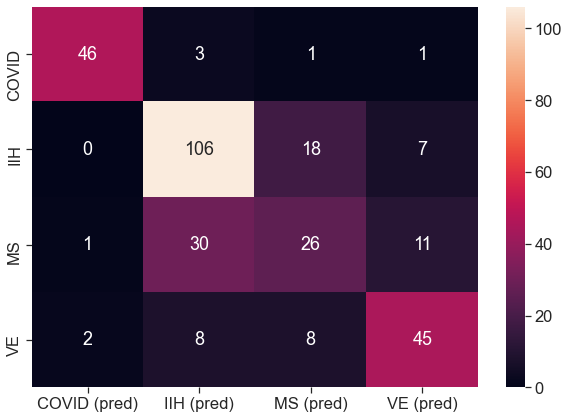

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
cm_df = pd.DataFrame(
    cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.show()
# true labels are rows, predicted are columns

In [85]:
## Logistic regression ##
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

# typical regression models use all features

# create the model
lr = LogisticRegression()
# fit the model
lr.fit(X_train,y_train)
# make predictions
y_predict_lr = lr.predict(X_test)
# calculate accuracy
accuracy = metrics.accuracy_score(np.array(y_test), y_predict_lr)
print("accuracy: ",accuracy)

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


accuracy:  0.8210862619808307


In [84]:
mySolvers = {"newton-cg":0,
          "lbfgs":0,
          "liblinear":0,
          "sag":0,
          "saga":0}

for i in mySolvers:
    lr = LogisticRegression(solver=i)
    # fit the model
    lr.fit(X_train,y_train)
    # make predictions
    y_predict_lr = lr.predict(X_test)
    # calculate accuracy
    accuracy = metrics.accuracy_score(np.array(y_test), y_predict_lr)
    mySolvers[i] = accuracy
    
print(mySolvers)

"""
{'newton-cg': 0.805111821086262,
    'lbfgs': 0.8210862619808307,
    'liblinear': 0.8178913738019169,
    'sag': 0.8019169329073482,
    'saga': 0.7987220447284346}
"""

/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/Applications/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


{'newton-cg': 0.805111821086262, 'lbfgs': 0.8210862619808307, 'liblinear': 0.8178913738019169, 'sag': 0.8019169329073482, 'saga': 0.7987220447284346}


"\n{'newton-cg': 0.805111821086262,\n    'lbfgs': 0.8210862619808307,\n    'liblinear': 0.8178913738019169,\n    'sag': 0.8019169329073482,\n    'saga': 0.7987220447284346}\n"

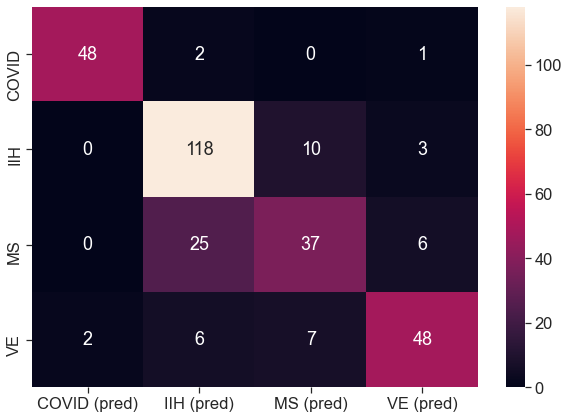

In [66]:
# confusion mtx
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test,y_predict_lr)
cm_lr_df = pd.DataFrame(
    cm_lr, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
# fmt='g' removes default behavior of adding "e"
sns.heatmap(cm_lr_df, annot=True, fmt='g')
plt.show()

In [67]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(classification_report(y_test, y_predict_lr))

# Precision: percentage of time model is actually right when it says it is right
# Recall: percentage of time model predicts correctly out of the total correct diagnosis
# F1-score: average the precision and recall
# Support: total number of samples

              precision    recall  f1-score   support

       COVID       0.96      0.94      0.95        51
         IIH       0.78      0.90      0.84       131
          MS       0.69      0.54      0.61        68
          VE       0.83      0.76      0.79        63

    accuracy                           0.80       313
   macro avg       0.81      0.79      0.80       313
weighted avg       0.80      0.80      0.80       313



In [68]:
## Random forest ##
# one example to try
from sklearn.ensemble import RandomForestClassifier 
# extremely random, creates thousands of trees and comes up with a group decision based off that

classifier = RandomForestClassifier(max_depth = 5, random_state = 35) #try diff max_depth values and random_state values??
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
print ("percent accuracy: ", classifier.score(X_test, y_test))

percent accuracy:  0.6357827476038339


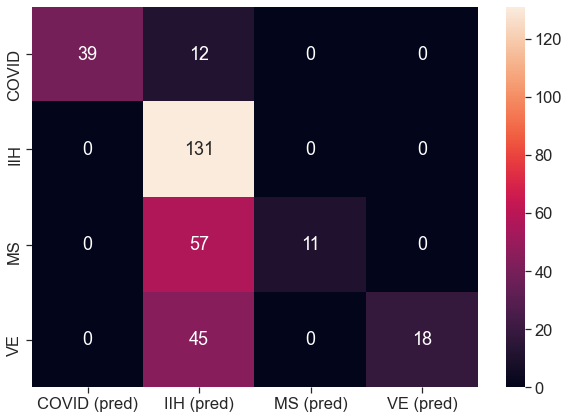

In [69]:
random_cm = confusion_matrix(y_test,y_predict)
random_cm_df = pd.DataFrame(
    random_cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(random_cm_df, annot=True, fmt='g')
plt.show()

In [70]:
## Support Vector Machines ##
from sklearn.svm import SVC
classifier = SVC()
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
classifier.score(X_test, y_test)

0.7827476038338658

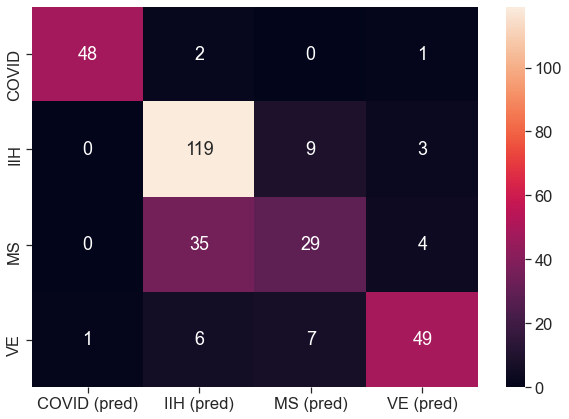

In [71]:
svc_cm = confusion_matrix(y_test,y_predict)
svc_cm_df = pd.DataFrame(
    svc_cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(svc_cm_df, annot=True, fmt='g')
plt.show()

In [72]:
 ## Naive Bayes ##
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier = classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
print(classifier.score(X_test, y_test))

0.4249201277955272


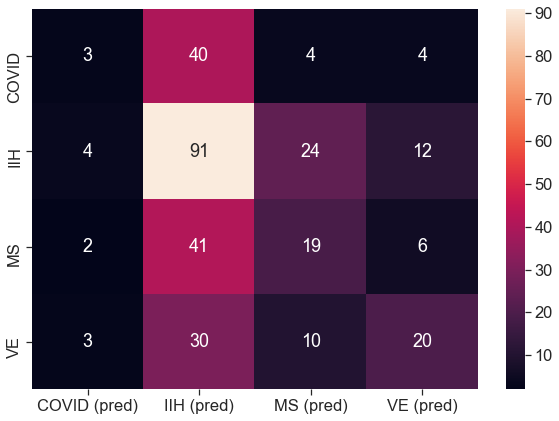

In [73]:
# the confusion matrix for the NB model
nb_cm = confusion_matrix(y_test,y_predict)
nb_cm_df = pd.DataFrame(
    nb_cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(nb_cm_df, annot=True)
plt.show()

In [74]:
from sklearn.neural_network import MLPClassifier

# Use a loop to test different hidden_layer_sizes
mlp = MLPClassifier(hidden_layer_sizes=(35,35,35), activation='logistic', solver='adam', max_iter=500)
classifier = mlp.fit(X_train,y_train)
y_predict = classifier.predict(X_test)
print(classifier.score(X_test, y_test))

0.8019169329073482


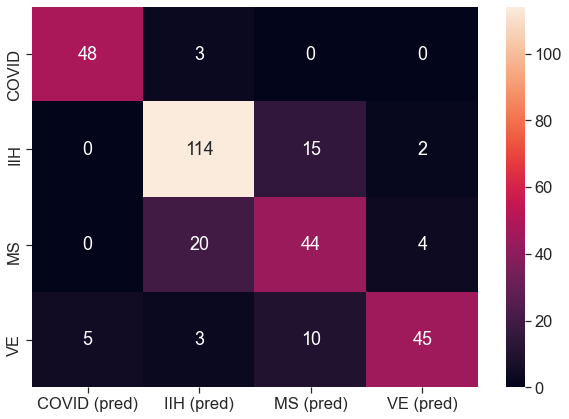

In [75]:
# the confusion matrix for the Neural Network Classifier
nb_cm = confusion_matrix(y_test,y_predict)
nb_cm_df = pd.DataFrame(
    nb_cm, 
    index = [idx for idx in ['COVID', 'IIH', 'MS', 'VE']],
    columns = [col for col in ['COVID (pred)', 'IIH (pred)', 'MS (pred)', 'VE (pred)']])
plt.figure(figsize = (10,7))
sns.heatmap(nb_cm_df, annot=True, fmt='g')
plt.show()

In [76]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=1)
neigh.fit(X_train, y_train)

print(classifier.score(X_test, y_test))

0.8019169329073482


In [77]:
# Source: https://www.kaggle.com/jeffd23/10-classifier-showdown-in-scikit-learn/execution?scriptVersionId=352798&cellId=7
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 72.2045%
Log Loss: 4.689145314869527
SVC
****Results****
Accuracy: 78.2748%


AttributeError: predict_proba is not available when  probability=False

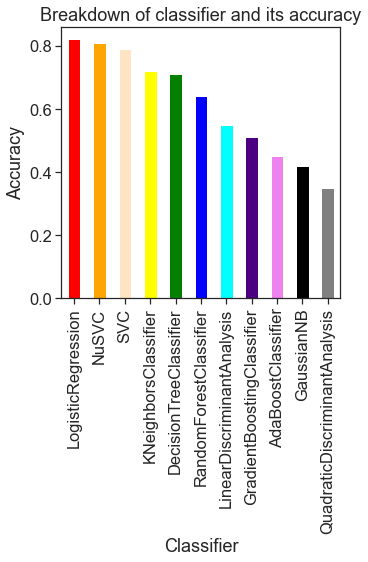

In [82]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# **Functions**
# Sorts the dictionary from highest to lowest Percent Accuracy
def sortDict(d, reverse = True):
  return dict(sorted(d.items(), key = lambda x: x[1], reverse = reverse))
# Makes myClassifiers a list of all the keys in myAcc
def appendClassifiers():
    for key in myAcc:
        myClassifiers.append(key)
# Dictionary- Key is the classifier used, Value is the computed Percent Accuracy 
# * Customize this to your own data!!
myAcc = {'KNeighborsClassifier': 0.72,
         'SVC': 0.79,
         'NuSVC': 0.81,
         'DecisionTreeClassifier': 0.71,
         'RandomForestClassifier': 0.64,
         'AdaBoostClassifier': 0.45,
         'GradientBoostingClassifier': 0.51,
         'GaussianNB': 0.42,
         'LinearDiscriminantAnalysis': 0.55,
         'QuadraticDiscriminantAnalysis': 0.35,
         'LogisticRegression': 0.82
        }
myAcc = sortDict(myAcc)
myClassifiers = []
appendClassifiers()
# **Create Bar Plot**
myColors = ["red", "orange", "bisque", "yellow", "green", "blue", 'cyan', "indigo", "violet", "black", "grey"]
ser = pd.Series(data=myAcc, index=myClassifiers)
ser.plot.bar(figsize=(5,5), legend=False, color=myColors)
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.title("Breakdown of classifier and its accuracy")
plt.show()

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Binarize the output
phenos_diag = list(phenos["dx"]) # change phenos["dx"] from a series to a list
phenos_diag = label_binarize(phenos["dx"], classes=['COVID','IIH','MS','VE'])
# label_binarize- if the patient has COVID -> [1,0,0,0]
n_classes = phenos_diag.shape[1] # 4 classes/ columns!

# Shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(data,phenos_diag,stratify=phenos_diag,
                                                    test_size=0.25,random_state=35,)

# Learn to predict each class against the other
random_state = np.random.RandomState(0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    # Change dictionary value to be the ROC area
    roc_auc[i] = auc(fpr[i], tpr[i])

In [ ]:
# -- Why does COVID have 1.0 if there are false positives present in the confusion matrix?
# --- Why is that when we only plot 'COVID' the AROC is 0.85, but when we plot all the curves the AROC is 1.0?

##ROC curve for 'COVID' (index: 0)##
# Style graph
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0]) # Used to be roc_auc[2]
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##All ROC curves##
# Style graph
plt.figure(figsize = (10,10))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue','red'])
classes=['COVID','IIH','MS','VE']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Add labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

##Findings##
# - [Covid and VE], [IIH and MS] are 'clustered' together
# - Diagonal line through the middle represents a coin flip scenario

In [ ]:
# PR curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

In [ ]:
from itertools import cycle

# Plot Styles
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue'])
plt.figure(figsize=(10,10))

f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')

classes=['COVID','IIH','MS','VE']

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(classes[i], average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))

plt.show()

In [ ]:
#Nearest Neighbors Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=8,algorithm='ball_tree', weights='distance')
    
#Fit the model
knn.fit(X_train, y_train)


#Compute accuracy on the test set
knn.score(X_test, y_test)

In [ ]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()